# Simple Linear Regression

To follow said linearity, labels **y** abide to the expression:
$$\textbf{y} = 3\textbf{x} +4 + rand(-1,1)$$

In [1]:
import numpy as np
m = 1 # Noise Magnitude
X = 2 * np.random.rand(100, 1) # Independent predictor variable, with random values in the [0, 2] interval
y = 4 + 3 * X + ((np.random.rand(100, 1) * 2 - 1) * m) # Dependent or target variable: labels

X

array([[0.42071334],
       [0.34046713],
       [1.63081385],
       [1.0991432 ],
       [1.11742137],
       [0.81197609],
       [1.50521478],
       [0.37473173],
       [0.51851476],
       [0.1298721 ],
       [0.88706085],
       [1.52525756],
       [0.82041985],
       [0.80211112],
       [1.81839405],
       [1.62681919],
       [1.37046704],
       [0.10561044],
       [0.48979266],
       [0.47822599],
       [0.18539371],
       [0.86239248],
       [0.1126604 ],
       [0.43262798],
       [0.74950811],
       [1.17147827],
       [1.01079561],
       [0.57419894],
       [0.9473206 ],
       [1.14891141],
       [0.34834797],
       [0.12020175],
       [1.13193974],
       [0.58509961],
       [1.33886917],
       [1.95554994],
       [1.31340506],
       [0.03683061],
       [0.18864888],
       [1.96373801],
       [0.76847238],
       [0.73981633],
       [0.69871766],
       [0.94894473],
       [1.14925237],
       [1.2664411 ],
       [1.64287831],
       [1.596

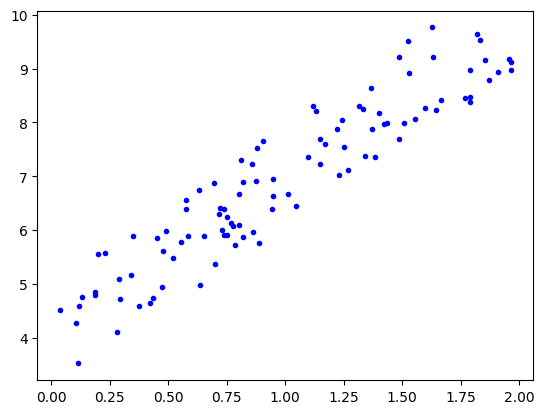

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.show()

Next, based on the data created we will train and build a linear regression model using *scikit-learn*.

After training the model, the class attributes "*coef_*" e "*intercept_*" allow to see the parameters of the model learnt, that is, $\theta_1$ y $\theta_0$, respectively.

In [3]:
# @title 1st option - build from scratch
class LinearRegressionScratch:
    """
    Custom implementation of linear regression using ordinary least squares (OLS).
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # # Add a column of ones to X to account for the intercept
        # X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # # Calculate coefficients using the closed-form solution
        # self.__coef_ = np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), np.dot(X_b.T, y))

        # Calculate coefficients using the closed-form solution
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        # return np.dot(X, self.__coef_[1:]) + self.__coef_[0]
        return np.dot(X, self.coef_) + self.intercept_



lin_reg_scratch = LinearRegressionScratch() # Import and initialize scikit-learn class for linear regression models
lin_reg_scratch.fit(X, y) # Train regression model
lin_reg_scratch.coef_, lin_reg_scratch.intercept_ # Take a look at the parameters learnt

(array([[6.03371648]]), np.float64(0.9500996541837256))

In [4]:
# @title 1.2 - build linear model + learning update (gradient descent + learning rate)
class UpdatedLinearRegressionScratch:
    """
    Custom implementation of linear regression using gradient descent.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fits the linear regression model to the given data using gradient descent.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the input data.
            y: A numpy array of shape (n_samples,) representing the target values.
        """
        # Initialize coefficients (slope) and intercept to zero or random small values
        self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        self.intercept_ = np.mean(y - np.dot(X, self.coef_))

        m = len(y)  # number of training examples

        for _ in range(self.n_iterations):
            # Calculate the predictions
            y_pred = self.predict(X)

            # Compute the residuals (errors)
            error = (y_pred - y)

            # Calculate the gradient for intercept (slope) and coefficients (slope)
            intercept_gradient = (1/m) * np.sum(error)
            coef_gradient = (1/m) * np.dot(X.T, error)

            # Update the parameters using the gradients
            self.intercept_ -= self.learning_rate * intercept_gradient
            self.coef_ -= self.learning_rate * coef_gradient

    def predict(self, X):
        """
        Predicts the target values for new data.
        Args:
            X: A numpy array of shape (n_samples, n_features) representing the new input data.
        Returns:
            A numpy array of shape (n_samples,) representing the predicted target values.
        """
        return np.dot(X, self.coef_) + self.intercept_

# print(X, X.shape, y, y.shape)
lr = 0.1
n_iter = 10000
lin_reg_updated = UpdatedLinearRegressionScratch(learning_rate=lr, n_iterations=n_iter)
lin_reg_updated.fit(X, y)
lin_reg_updated.coef_, lin_reg_updated.intercept_

(array([[2.65594706]]), np.float64(4.285535670406837))

Visualize of the model prediction

<function matplotlib.pyplot.show(close=None, block=None)>

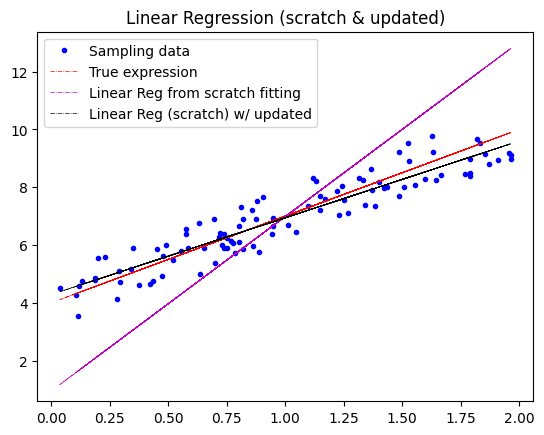

In [5]:
plt.plot(X, y, "b.", label='Sampling data')
y_real = 3 * X + 4
plt.plot(X, y_real, "r-.", label='True expression', linewidth=0.5)
y_hat = lin_reg_scratch.coef_[0]*X + lin_reg_scratch.intercept_
plt.plot(X, y_hat, "m-.", label='Linear Reg from scratch fitting', linewidth=0.5)
y_hat_updated = lin_reg_updated.coef_[0]*X + lin_reg_updated.intercept_
plt.plot(X, y_hat_updated, "k-.", label='Linear Reg (scratch) w/ updated', linewidth=0.5)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scratch & updated)')
plt.legend()
plt.show

In [ ]:
X_test = np.array([[0], [2]])
y_test_scratch = lin_reg_scratch.predict(X_test) #Predict label for two instances: x=0 y x=2
y_test_scratch

array([[ 0.70283137],
       [12.78581095]])

In [ ]:
X_test = np.array([[0], [2]])
y_test_scratch_up = lin_reg_updated.predict(X_test) #Predict label for two instances: x=0 y x=2
y_test_scratch_up

array([[ 3.90490102],
       [10.13762021]])

In [ ]:
# @title 2nd option - call Scikit-learn API function
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # Import and initialize scikit-learn class for linear regression models
lin_reg.fit(X, y) # Train regression model
lin_reg.coef_, lin_reg.intercept_ # Take a look at the parameters learnt

(array([[3.1163596]]), array([3.90490102]))

<function matplotlib.pyplot.show(close=None, block=None)>

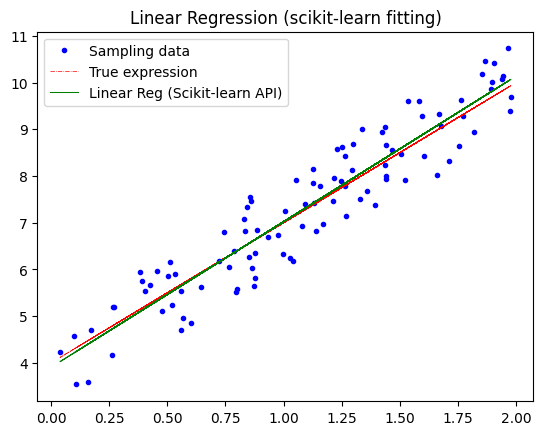

In [ ]:
plt.plot(X, y, "b.", label='Sampling data')
y_real = 3 * X + 4
plt.plot(X, y_real, "r-.", label='True expression', linewidth=0.5)
y_hat = lin_reg.coef_[0]*X + lin_reg.intercept_[0]
plt.plot(X, y_hat, "g-", label='Linear Reg (Scikit-learn API)', linewidth=0.75)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scikit-learn fitting)')
plt.legend()
plt.show

Lastly, we use the model learnt to predict the label **y** given two example instances.
We also visualize the model learnt -a regression line function- along with the training data used, in order to observe how the line fits such data.

In [ ]:
X_test = np.array([[0], [2]])
y_test = lin_reg.predict(X_test) #Predict label for two instances: x=0 y x=2
y_test

array([[ 3.90490102],
       [10.13762021]])

<function matplotlib.pyplot.show(close=None, block=None)>

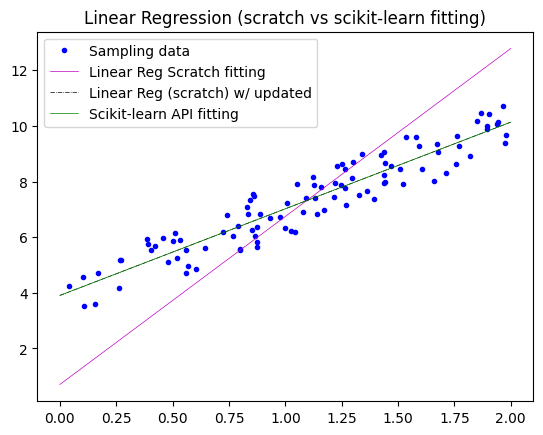

In [ ]:
plt.plot(X, y, "b.", label='Sampling data')
plt.plot(X_test, y_test_scratch, "m-", label='Linear Reg Scratch fitting', linewidth=0.5) # To visualize the regression line, it is enough to indicate two points (x,y) belonging to it.
plt.plot(X_test, y_test_scratch_up, "k-.", label='Linear Reg (scratch) w/ updated', linewidth=0.5)
plt.plot(X_test, y_test, "g-", label='Scikit-learn API fitting', linewidth=0.5)
# plt.axis([0, 2, 0, 15])
plt.title('Linear Regression (scratch vs scikit-learn fitting)')
plt.legend()
plt.show

(np.float64(0.0), np.float64(0.02), np.float64(4.04), np.float64(4.1))

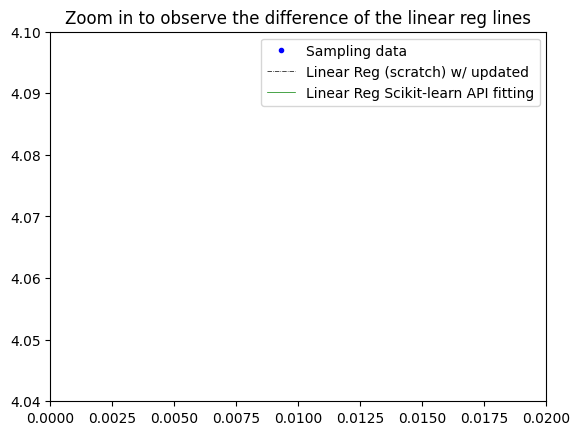

In [ ]:
plt.plot(X, y, "b.", label='Sampling data')
# plt.plot(X_test, y_test_scratch, "m-", label='Scratch fitting', linewidth=0.5)
plt.plot(X_test, y_test_scratch_up, "k-.", label='Linear Reg (scratch) w/ updated', linewidth=0.5)
plt.plot(X_test, y_test, "g-", label='Linear Reg Scikit-learn API fitting', linewidth=0.5)
plt.title('Zoom in to observe the difference of the linear reg lines')
plt.legend()
plt.axis([0, 0.02, 4.04, 4.1]) # [xmin. xmax, ymin, ymax]

---------------

# Polynomial Regression (linear regression with power of n)

We start generating some random nonlinear data, concretely based on a quadratic equation combined with some gaussian noise:
$$\textbf{y} = 0.5\textbf{x}^2 + \textbf{x} + 2 + rand(0,1)$$

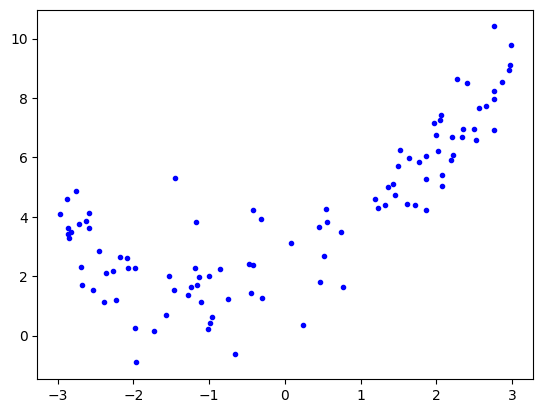

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, "b.")

The **PolynomialFeatures** class in *scikit-learn* helps transforming out training data, adding powers of each original numerical attribute as new predictor attributes. In this example, we only have one attribute, and we will choose to add a new attribute as the squared (degree 2 polynomial) of the original values:

In [ ]:
# @title Polynomial regression (1 input (power of m), 1output): Y = b0X^0 + b1X^1 + b2X^2 + … + bm*X^m + E, in this case, using power of 2

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_p2 = poly_features.fit_transform(X)
X[0], X_poly_p2[0]

(array([2.06539918]), array([2.06539918, 4.26587379]))

Now it's possible to apply "linear" regression on the "extended dataset":

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg_p2 = LinearRegression()
lin_reg_p2.fit(X_poly_p2, y)
lin_reg_p2.intercept_, lin_reg_p2.coef_

(array([2.22990442]), array([[0.98806698, 0.46982627]]))

In [ ]:
# @title Elif using power of 3 then

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_p3 = poly_features.fit_transform(X)
X[0], X_poly_p3[0]

(array([2.06539918]), array([2.06539918, 4.26587379, 8.81073225]))

In [ ]:
lin_reg_p3 = LinearRegression()
lin_reg_p3.fit(X_poly_p3, y)
lin_reg_p3.intercept_, lin_reg_p3.coef_

(array([2.24782754]), array([[ 1.24165644,  0.4641075 , -0.04362045]]))

Let's also train a regression line with the dataset original (that is, without the new squared attribute) and we will compare graphically the two models trained:

In [ ]:
# @title Linear regression (1 input (power of 1), 1output): Y = b0 + b1X + E

lin_reg1 = LinearRegression()
lin_reg1.fit(X, y) # WARNING: here are using the original, not extended data for training
lin_reg1.intercept_, lin_reg1.coef_

(array([4.02903085]), array([[0.98618201]]))

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

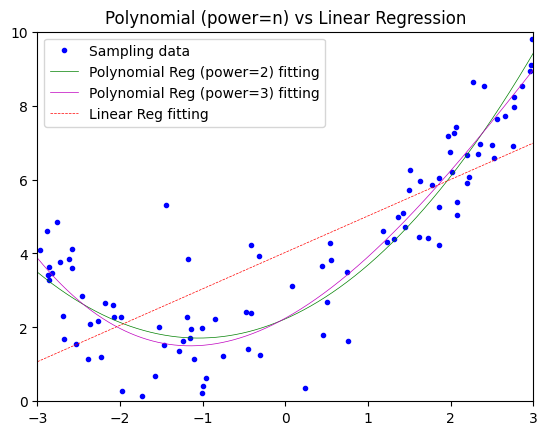

In [ ]:
# Plot the data
plt.plot(X, y, "b.", label='Sampling data')

x = np.linspace(-3, 3, 1000) # 1000 points evenly separated along the interval [-3,3]

# Plot the polynomial regression curve (parabola)
# Power of 2: Y = b0 + b1X^1 + b2X^2 + E, i.e., Y = 3.722463 + 1.0078279.x^1 + 0.50881591.x^2
yq2 = lin_reg_p2.coef_[0][0]*x + lin_reg_p2.coef_[0][1]*(x**2) + lin_reg_p2.intercept_[0]
plt.plot(x, yq2, "g-", label='Polynomial Reg (power=2) fitting', linewidth=0.5)

# Power of 3: Y = b0X^0 + b1X^1 + b2X^2 + b3X^3 + E, i.e., Y = 3.722463 + 1.00853091e+00.x^1 + 5.08794391e-01.x^2 + -1.23192656e-04.x^3
yq3 = lin_reg_p3.coef_[0][0]*x + lin_reg_p3.coef_[0][1]*(x**2) + lin_reg_p3.coef_[0][2]*(x**3) + lin_reg_p3.intercept_[0]
plt.plot(x, yq3, "m-", label='Polynomial Reg (power=3) fitting', linewidth=0.5)

# Plot the simple linear regression line learnt (power of 1), i.e., Y = 3.722463 + 0.82194947x
yl = lin_reg1.coef_[0]*x + lin_reg1.intercept_[0]
plt.plot(x, yl, "r--", label='Linear Reg fitting', linewidth=0.5)


plt.title('Polynomial (power=n) vs Linear Regression')
plt.legend()
plt.axis([-3, 3, 0, 10])

(np.float64(-2.0), np.float64(-0.5), np.float64(1.0), np.float64(2.0))

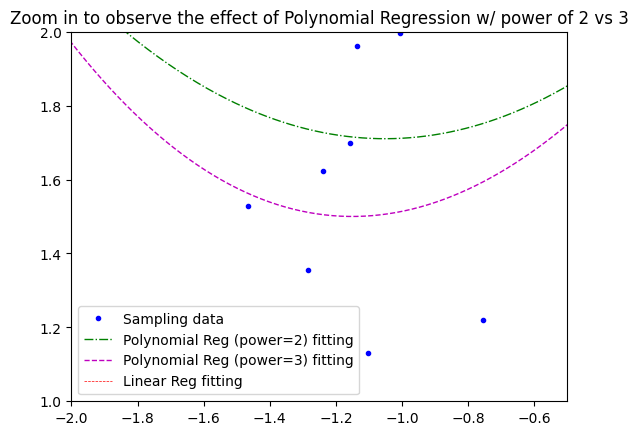

In [ ]:
plt.plot(X, y, "b.", label='Sampling data')
plt.plot(x, yq2, "g-.", label='Polynomial Reg (power=2) fitting', linewidth=1)
plt.plot(x, yq3, "m--", label='Polynomial Reg (power=3) fitting', linewidth=1)
plt.plot(x, yl, "r--", label='Linear Reg fitting', linewidth=0.5)
plt.title('Zoom in to observe the effect of Polynomial Regression w/ power of 2 vs 3')
plt.legend()
plt.axis([-2, -0.5, 1.00, 2.00]) # [xmin. xmax, ymin, ymax]

--------
# Homework

1. จากโค้ดที่มีไว้เพื่อสร้าง data ต่อไปนี้ และแสดงผลในรูปแบบของ scatterplot
$$\textbf{y} = 3\textbf{x}^3 + 2\textbf{x}^2 + 3\textbf{x} + 4 + 2m*(rand(100,1)-1); m = noise $$
``` python
m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = (3 * X_HW**3) + (2 * X_HW**2) + (3 *X_HW) + 4 + (2*m*(np.random.rand(100, 1) - 1))
```
  1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)
  ``` python
  class LinearRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.coef_ = None
          self.intercept_ = None

      def fit(self, X, y):
          """
          Fits the linear regression model to the given data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the input data.
              y: A numpy array of shape (n_samples,) representing the
  target values.
          """
          # Calculate coefficients using the closed-form solution
          ...

      def predict(self, X):
          """
          Predicts the target values for new data.
          Args:
              X: A numpy array of shape (n_samples, n_features) representing the new input data.
          Returns:
              A numpy array of shape (n_samples,) representing the predicted target values.
          """
          return np.dot(X, self.coef_) + self.intercept_
  ```
  1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ
  ``` python
  # param init
  a0, a1, a2 = ...
  alpha = ...  # learning rate
  iterations = ...  # iteration of Gradient Descent
  m = len(hours)

  # forward
    class PolyRegressionScratch:
      """
      Custom implementation of linear regression using ordinary least squares (OLS).
      """
      def __init__(self):
          self.a2 = 1
          self.a1 = 1
          self.a0 = 1

      def predict(x, a0, a1, a2):
          return a2 * x**2 + a1 * x + a0

      # Cost function (MSE)
      def compute_cost(self, hours, gpa):
          ...

      # Gradient Descent
      for _ in range(iterations):
          predictions = ...

          # gradient compute
          ...

          # parameter update
          ...

          # cost compute if more iteration (optional)
          if _ % 100 == 0:
              print(f"Iteration {_}, Cost: {compute_cost(self, hours, gpa)}")

      # print(f"Optimized a0: {a0}, a1: {a1}, a2: {a2}")

  ```
  1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree ด้วยตัวเอง และนำ extended dataset ไป fit กับโมเดล Linear Regression จากข้อ 1.1
  ``` python
  from sklearn.preprocessing import PolynomialFeatures
  d = ? #เเทนค่าด้วย Degree ที่ควรจะใช้จาก dataset ข้อที่ 1
  poly_features = PolynomialFeatures(degree=d, include_bias=False)
  X_poly = poly_features.fit_transform(X_HW)
  X_HW[0], X_poly[0]

  model = ? # เเทนค่าด้วย LinearRegression ที่ได้ Train ไว้จากข้อ 1.1
  ```

  1.4  เเเสดงผล plot จาก matplotlib.pyplot ตามโค้ดต่อไปนี้โดยจากกราฟจะประกอบไปด้วย
  - Linear-Reg fitting จากข้อ 1.1 (LinearRegressionScratch)
  - Poly-Reg fitting (degree=2) จากข้อ 1.2 (PolyRegressionScratch)
  - Poly-Reg (degree=n) Scikit-learn API จากข้อ 1.3

  ``` python
  # Plot the data
  plt.plot(X_HW, y_HW, "b.", label='Sampling data')
  x = np.linspace(-3, 3, 1000)

  # Plot the line
  plt.plot(X_HW, y_linear, "y-.", label='Lin-Reg fitting', linewidth=0.25)
  plt.plot(X_HW, y_p2_sc, "r--", label='Poly-Reg (degree=2) from my class function', linewidth=0.5)
  plt.plot(X_HW, y_p2_scikit, "g--", label='Poly-Reg (degree=n) Scikit-learn API', linewidth=0.75)
  plt.title('LinearReg vs PolyReg (Scratch) vs PolyReg (Scikit)')
  plt.legend()

  ```

  1.5 วัดผลความแม่นยำของการทำนายด้วยตัวชี้วัดที่เรียกว่า R-squared (R²) หรือค่าความแปรปรวนที่อธิบายได้ของโมเดล
จากนั้นอธิบายความหมาย และเปรียบเทียบค่า R² ที่ได้จากแต่ละวิธี (จาก 3 model ข้างต้น) เพื่อวิเคราะห์ว่า วิธีไหนให้ผลการทำนายที่แม่นยำกว่ากัน และเพราะเหตุใด

In [3]:
import numpy as np

m = 1 # Noise Magnitude
X_HW = 2 * np.random.rand(100, 1)
y_HW = (3 * X_HW**3) + (2 * X_HW**2) + (3 *X_HW) + 4 + (2*m*(np.random.rand(100, 1) - 1))




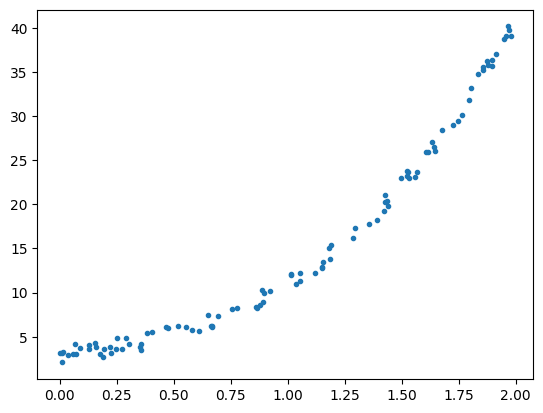

In [4]:
import matplotlib.pyplot as plt

plt.plot(X_HW, y_HW, '.' )
plt.show()

Intercept : -0.6180473688294387
Coef : [[16.08890604]]


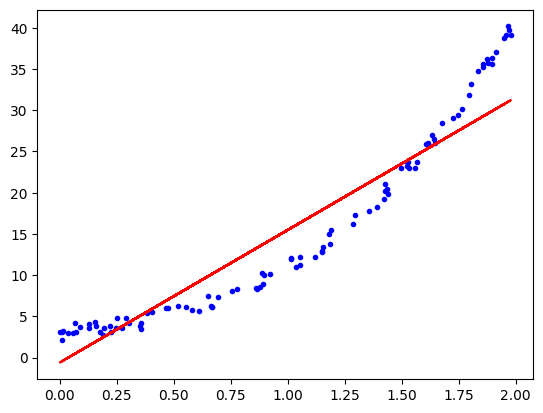

In [36]:
# 1.1 สร้าง linear regression from scratch แล้ว run แค่เพียง inference (no update)

from ctypes import Array


class LinearRegressionScratch:
	"""
	Custom implementation of linear regression using ordinary least squares (OLS).
	"""
	def __init__(self):
		self.coef_ = None # m
		self.intercept_ = None # b

	def fit(self, X, y):
		self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
		self.intercept_ = np.mean(y - np.dot(X, self.coef_))

	def predict(self, X):
		"""
		  Predicts the target values for new data.
		  Args:
			  X: A numpy array of shape (n_samples, n_features) representing the new input data.
		  Returns:
			  A numpy array of shape (n_samples,) representing the predicted target values.
		"""
		return np.dot(X, self.coef_) + self.intercept_
	

X_reshape, Y_reshape = X_HW.reshape(-1, 1), y_HW.reshape(-1, 1)
lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_reshape, Y_reshape)

print(f"Intercept : {lin_reg_scratch.intercept_}")
print(f"Coef : {lin_reg_scratch.coef_}")


y_pred = lin_reg_scratch.predict( X_HW )

plt.plot( X_HW, y_HW, '.', color='blue')
( y_pred.shape)
plt.plot( X_HW, y_pred, color='red' )


Iteration 0, Cost: 182.36818291150342
Polynomial Reguession => 6.314563781197392x^2 + 3.6044955415611075x + 2.5729213247775378


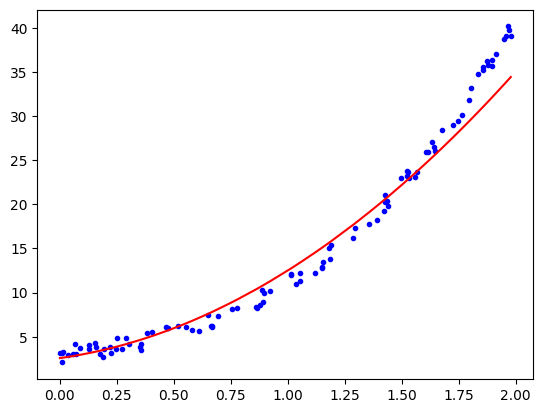

In [51]:
#   1.2 สร้าง polynomial regression from scratch แล้ว run กำหนดให้อัตราการเรียนรู้ (learning rate) เท่ากับ 1e-3 และจำนวนรอบการวนซ้ำ (iteration) เท่ากับ 1000 รอบ

# a0, a1, a2 = ...
# alpha = ...  # learning rate
# iterations = ...  # iteration of Gradient Descent
# m = len(hours)

# forward
class PolyRegressionScratch:
	"""
	Custom implementation of linear regression using ordinary least squares (OLS).
	"""
	def __init__(self, learning_rate=0.01, n_iterations=1000):
		self.a2 = None
		self.a1 = None
		self.a0 = None
		self.learning_rate = learning_rate
		self.n_iterations = n_iterations
		self.cost_history = []

	def predict(self, x):
		return self.a2 * x ** 2 + self.a1 * x + self.a0

	# Cost function (MSE)
	def compute_cost(self, x, y_real):
	
		self.a2 = np.random.normal( 0, 0.1 )
		self.a1 = np.random.normal( 0, 0.1 )
		self.a0 = np.random.normal( 0, 0.1 )

		# Gradient Descent
		for _ in range(self.n_iterations):
			y_pred = self.predict( x )

			# gradient compute

			m = len( y_real )
			error = y_pred - y_real

			da2 = ( 1 / m ) * np.sum( error * x ** 2 )
			da1 = ( 1 / m ) * np.sum( error * x )
			da0 = ( 1 / m ) * np.sum( error )

			# parameter update
			cost = ( 1 / ( 2 * m)) * np.sum((y_pred - y_real) ** 2)
			self.cost_history.append( cost )

			self.a2 -= self.learning_rate * da2
			self.a1 -= self.learning_rate * da1
			self.a0 -= self.learning_rate * da0


			# # cost compute if more iteration (optional)
			if _ % 100 == 0:
				print(f"Iteration {_}, Cost: {cost}")
	
	def __str__( self ):
		return f'Polynomial Reguession => {self.a2}x^2 + {self.a1}x + {self.a0}' 
		

x_reshape, y_reshape = X_HW.reshape(-1, 1), y_HW.reshape(-1, 1)
lr = 0.01
n_iter = 50
polyRegression = PolyRegressionScratch(learning_rate=lr, n_iterations=n_iter)
polyRegression.compute_cost(x_reshape, y_reshape)
print( polyRegression )
y_pred = polyRegression.predict( X_HW )

sorted_indices = np.argsort( X_HW.flatten() )
X_sorted = X_HW[ sorted_indices ]
Y_pred_sorted = y_pred[ sorted_indices ]  

plt.plot( X_HW, y_HW, '.b')
plt.plot( X_sorted, Y_pred_sorted, '-r')



In [52]:
# 1.3 เเปลงข้อมูลเป็น extended โดยที่กำหนด power degree ด้วยตัวเอง และนำ extended dataset ไป fit กับโมเดล Linear Regression จากข้อ 1.1

from sklearn.preprocessing import PolynomialFeatures

d = 2 #เเทนค่าด้วย Degree ที่ควรจะใช้จาก dataset ข้อที่ 1
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X_HW)
X_HW[0], X_poly[0]

# model = ? # เเทนค่าด้วย LinearRegression ที่ได้ Train ไว้จากข้อ 1.1


ModuleNotFoundError: No module named 'sklearn'